# Data pre-processing

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Input files

ROOT_FOLDER = "../"
DATA_FOLDER = "data/raw/"

DATA_PATH_AMB_SPEC = ROOT_FOLDER + DATA_FOLDER + "IMPROVE_2011-2013_filterSubtractionV2.csv"
DATA_PATH_AMB_CONC = ROOT_FOLDER + DATA_FOLDER + "IMPROVE_2011_2013_XRF_OC_ions_mug_cm2.csv"
DATA_PATH_LAB_SPEC = ROOT_FOLDER + DATA_FOLDER + "matched_std_2784_baselined_filter_subtracted.csv"
DATA_PATH_LAB_CONC = ROOT_FOLDER + DATA_FOLDER + "FG_Ruthenburg_std_responses.csv"

In [11]:
# Output files

DATA_FOLDER = "data/processed/"

# Processed files
PROCESS_AMB_SPEC = ROOT_FOLDER + DATA_FOLDER + "data_amb_spec_clean.csv"
PROCESS_AMB_CONC = ROOT_FOLDER + DATA_FOLDER + "data_amb_conc_clean.csv"
PROCESS_LAB_SPEC = ROOT_FOLDER + DATA_FOLDER + "data_lab_spec_clean.csv"
PROCESS_LAB_CONC = ROOT_FOLDER + DATA_FOLDER + "data_lab_conc_clean.csv"

## 

# Files with numerical values only, to use as input for models + files with sites label only
OUTPUT_AMB_SPEC = ROOT_FOLDER + DATA_FOLDER + "input_amb_spec.csv"
OUTPUT_AMB_CONC = ROOT_FOLDER + DATA_FOLDER + "input_amb_conc.csv"

OUTPUT_LAB_SPEC_TRAIN = ROOT_FOLDER + DATA_FOLDER + "input_lab_spec_train.csv"
OUTPUT_LAB_SPEC_TEST = ROOT_FOLDER + DATA_FOLDER + "input_lab_spec_test.csv"
OUTPUT_LAB_CONC_TRAIN = ROOT_FOLDER + DATA_FOLDER + "input_lab_conc_train.csv"
OUTPUT_LAB_CONC_TEST = ROOT_FOLDER + DATA_FOLDER + "input_lab_conc_test.csv"

INDEX_LAB_CONC_TRAIN = ROOT_FOLDER + DATA_FOLDER + "index_lab_conc_train.csv"
INDEX_LAB_CONC_TEST = ROOT_FOLDER + DATA_FOLDER + "index_lab_conc_test.csv"

# I. Ambient samples : spectra

In [3]:
# Import data
file = pd.read_csv(DATA_PATH_AMB_SPEC, index_col="Unnamed: 0")
data_amb_spec = pd.DataFrame(file)

In [4]:
data_amb_spec.head()

,Wavenumber,MEVEX_20110103,MEVEX_20110106,MEVEX_20110109,MEVEX_20110112,MEVEX_20110115,MEVEX_20110118,MEVEX_20110121,MEVEX_20110124,MEVEX_20110127,...,YOSEX_20131203,YOSEX_20131206,YOSEX_20131209,YOSEX_20131212,YOSEX_20131215,YOSEX_20131218,YOSEX_20131221,YOSEX_20131224,YOSEX_20131227,YOSEX_20131230
1,3998.423206,-0.001106,-0.001221,-0.000841,-0.000614,-0.000902,-0.000979,-0.001136,-0.001813,-0.000567,...,-0.000565,-0.000794,-0.000463,-0.000672,-0.000570,-0.000612,-0.000366,-0.000744,-0.000516,-0.000481
2,3997.137539,-0.001102,-0.001202,-0.000820,-0.000601,-0.000895,-0.000968,-0.001127,-0.001799,-0.000562,...,-0.000549,-0.000786,-0.000449,-0.000654,-0.000555,-0.000599,-0.000359,-0.000726,-0.000499,-0.000476
3,3995.851872,-0.001093,-0.001194,-0.000805,-0.000585,-0.000881,-0.000957,-0.001116,-0.001772,-0.000554,...,-0.000540,-0.000775,-0.000438,-0.000640,-0.000545,-0.000584,-0.000356,-0.000713,-0.000488,-0.000469
4,3994.566206,-0.001076,-0.001191,-0.000796,-0.000574,-0.000865,-0.000949,-0.001105,-0.001738,-0.000551,...,-0.000540,-0.000760,-0.000430,-0.000628,-0.000539,-0.000568,-0.000356,-0.000705,-0.000482,-0.000457
5,3993.280539,-0.001051,-0.001181,-0.000788,-0.000569,-0.000850,-0.000943,-0.001094,-0.001703,-0.000555,...,-0.000543,-0.000742,-0.000422,-0.000618,-0.000535,-0.000551,-0.000355,-0.000700,-0.000479,-0.000444


In [5]:
data_amb_spec.describe()

,Wavenumber,MEVEX_20110103,MEVEX_20110106,MEVEX_20110109,MEVEX_20110112,MEVEX_20110115,MEVEX_20110118,MEVEX_20110121,MEVEX_20110124,MEVEX_20110127,...,YOSEX_20131203,YOSEX_20131206,YOSEX_20131209,YOSEX_20131212,YOSEX_20131215,YOSEX_20131218,YOSEX_20131221,YOSEX_20131224,YOSEX_20131227,YOSEX_20131230
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,...,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,2209.418096,0.002478,0.007629,0.003872,0.000755,0.002846,0.001433,0.001013,0.003287,0.001430,...,0.001695,0.005704,0.001430,0.001287,0.000852,0.002539,0.002858,0.001604,0.001278,0.002211
std,1033.439275,0.003319,0.012120,0.005527,0.003788,0.004476,0.002169,0.002260,0.005699,0.003522,...,0.003481,0.007803,0.003058,0.002604,0.002878,0.003606,0.004685,0.002809,0.002535,0.003416
min,420.412987,-0.004422,-0.018882,-0.004202,-0.034893,-0.012253,-0.002799,-0.015570,-0.018276,-0.023975,...,-0.022894,-0.022639,-0.018697,-0.016382,-0.023044,-0.016786,-0.023560,-0.016820,-0.018239,-0.019490
25%,1314.915541,0.000033,0.000153,0.000060,-0.000039,0.000013,0.000036,-0.000008,0.000106,-0.000092,...,0.000032,0.000267,0.000030,0.000065,-0.000002,0.000112,0.000045,0.000114,0.000088,0.000144
50%,2209.418096,0.001226,0.002561,0.001623,0.000450,0.001121,0.000686,0.000540,0.001375,0.000499,...,0.000922,0.002763,0.000663,0.000627,0.000506,0.001316,0.001378,0.000825,0.000779,0.001392
75%,3103.920651,0.003776,0.008820,0.005196,0.002017,0.004135,0.002288,0.001827,0.005028,0.002163,...,0.003092,0.008661,0.002526,0.002221,0.001782,0.003938,0.005227,0.002735,0.002305,0.003640
max,3998.423206,0.011784,0.066208,0.026547,0.007968,0.015947,0.013937,0.008819,0.036242,0.012822,...,0.021287,0.038668,0.022145,0.021931,0.022472,0.022211,0.025666,0.020729,0.021928,0.020227


## Data exploration

In [6]:
# Dimensions
print("Number of rows : ", len(data_amb_spec))
print("Number of columns : ", len(data_amb_spec.columns), "\n")

# Wavenumber
print("Wavenumber : from [", data_amb_spec["Wavenumber"].min(), " to ", 
      data_amb_spec["Wavenumber"].max(), "] \n")

# NaN values
nb_nan = data_amb_spec.isna().sum().sum()
print("Number of NaN values : ", nb_nan)

Number of rows :  2784
Number of columns :  3055 

Wavenumber : from [ 420.4129865599  to  3998.4232055216 ] 

Number of NaN values :  0


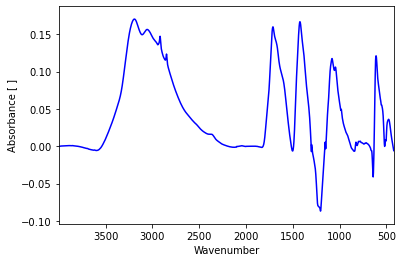

In [7]:
# Print and example of spectra

x = data_amb_spec["Wavenumber"]
y = data_amb_spec["BYIS1_20130504"]

fig = plt.figure()
plt.plot(x, y, 'b')
plt.xlabel('Wavenumber')
plt.ylabel('Absorbance [ ]')
plt.axis([max(x),min(x),min(y)-0.1*max(y),max(y)+0.1*max(y)]);

In [12]:
data_amb_spec.to_csv(PROCESS_AMB_SPEC, sep=',')

# II. Ambient samples : concentrations

In [29]:
# Import data
file = pd.read_csv(DATA_PATH_AMB_CONC)
data_amb_conc = pd.DataFrame(file)
data_amb_conc = data_amb_conc[['Unnamed: 0','SO4f:Value']]

In [30]:
data_amb_conc.head()

,Unnamed: 0,SO4f:Value
0,BIRM1_20110103,19.347126
1,BIRM1_20110106,NaN
2,BIRM1_20110109,NaN
3,BIRM1_20110112,NaN
4,BIRM1_20110115,15.073951


## Data exploration

In [31]:
# Dimensions
print("Number of rows : ", len(data_amb_conc), "\n")

# NaN values
nb_nan = data_amb_conc['SO4f:Value'].isna().sum()
print("Number of NaN values : ", nb_nan, "\n")

# Range of values
print("Minimum value : ", data_amb_conc.min().values)
print("Maximum value : ", data_amb_conc.max().values)

Number of rows :  4531 

Number of NaN values :  227 

Minimum value :  ['BIRM1_20110103' 0.0]
Maximum value :  ['YOSEX_20131230' 279.398436480527]


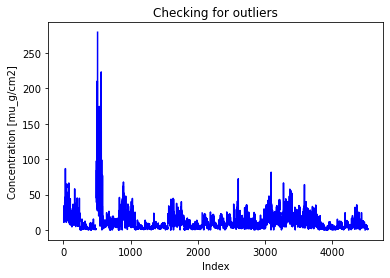

In [32]:
# Print the values to detect outliers

x = data_amb_conc.index
y = data_amb_conc["SO4f:Value"]

fig = plt.figure()
plt.plot(x, y, 'b')
plt.xlabel('Index')
plt.ylabel('Concentration [mu_g/cm2]')
plt.title('Checking for outliers');

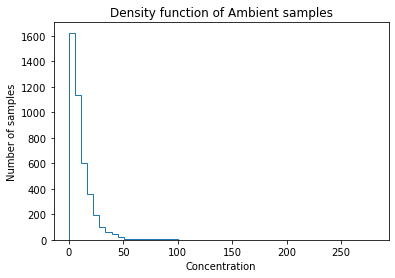

In [34]:
# Distribution function

# Frequency
stats_amb = data_amb_conc.groupby('SO4f:Value')['SO4f:Value'].agg('count') \
                        .pipe(pd.DataFrame) \
                        .rename(columns = {'SO4f:Value':'frequency'})\
                        .reset_index()

# PDF
stats_amb['pdf'] = stats_amb['frequency']/sum(stats_amb['frequency'])

stats_amb = stats_amb.drop(stats_amb.index[0])

plt.hist(stats_amb['SO4f:Value'], bins=50, histtype='step')
plt.title('Density function of Ambient samples')
plt.ylabel('Number of samples')
plt.xlabel('Concentration')
plt.show()

## Data analysis

Delete the samples with NaN concentration.

In [35]:
data_amb_conc = data_amb_conc.dropna().reset_index(drop=True)

The data from the file is in [$\mu$g/cm$^2$] of SO4. We multiply by molecular weight of (NH4)2 SO4 / molecular weight of SO4, so we get the concentration of (NH4)2 SO4 in [$\mu$g/cm$^2$].

In [36]:
# Molecular weights [g/mol] :
MW_SO4 = 96.06
MW_NH4SO4 = 132.14

data_amb_conc["SO4f:Value"] = data_amb_conc["SO4f:Value"].multiply(MW_NH4SO4/MW_SO4)
data_amb_conc.columns = ['Sites','(NH4)SO4']
data_amb_conc.head()

,Sites,(NH4)SO4
0,BIRM1_20110103,26.613880
1,BIRM1_20110115,20.735705
2,BIRM1_20110118,46.751548
3,BIRM1_20110121,21.738063
4,BIRM1_20110124,14.729169


In [37]:
print("Minimum value : ", data_amb_conc.min().values)
print("Maximum value : ", data_amb_conc.max().values)

Minimum value :  ['BIRM1_20110103' 0.0]
Maximum value :  ['YOSEX_20131230' 384.3400936553907]


In [38]:
data_amb_conc.to_csv(PROCESS_AMB_CONC, sep=',')

## Selection of samples

The sites are not the same between the spectra samples and concentration samples, so we keep only the ones for which we know both the spectra and the concentration.

In [22]:
sites_spec = pd.DataFrame(data_amb_spec.columns, columns = ['Sites'])
sites_spec = sites_spec.drop(sites_spec.index[[0]]).reset_index(drop=True)

sites_conc = data_amb_conc[['Sites']].reset_index(drop=True)

sites_both = pd.merge(sites_conc, sites_spec, how='inner').values.ravel()

data_amb_spec = data_amb_spec[sites_both]
data_amb_conc = data_amb_conc[['Sites', '(NH4)SO4']].loc[data_amb_conc['Sites'].isin(sites_both)]

In [23]:
print("Number of rows : ", len(data_amb_conc))
print("Number of rows : ", len(data_amb_spec.columns))

Number of rows :  2230
Number of rows :  2230


## Saving the new data

In [24]:
#del data_amb_spec['Wavenumber']
del data_amb_conc['Sites']

In [25]:
mat_amb_spec = data_amb_spec.reset_index(drop=True).to_numpy()
mat_amb_conc = data_amb_conc.reset_index(drop=True).to_numpy()

print(mat_amb_spec.shape)
print(mat_amb_conc.shape)

np.savetxt(OUTPUT_AMB_SPEC, mat_amb_spec, delimiter=',')
np.savetxt(OUTPUT_AMB_CONC, mat_amb_conc, delimiter=',')

(2784, 2230)
(2230, 1)


# III. Laboratory samples : spectra

In [40]:
# Import data
file = pd.read_csv(DATA_PATH_LAB_SPEC, index_col="Unnamed: 0")
data_lab_spec = pd.DataFrame(file)
data_lab_spec = data_lab_spec.sort_index(axis=1, ascending=True)

In [41]:
data_lab_spec.head()

,Wavenumber,X01012,X01020,X01021,X01022,X01027,X01033,X01034,X01050,X01092,...,X11054,X11055,X11056,X21046,X21047,X21048,X21049,X21050,X21051,X21052
1,3998.423206,-0.002246,-0.001828,-0.001196,-0.001546,-0.001464,-0.001665,-0.001718,-0.002252,-0.001366,...,-0.001412,-0.001581,-0.002158,-0.000590,-0.000876,-0.000956,-0.002222,-0.001690,-0.000941,-0.001959
2,3997.137539,-0.002221,-0.001810,-0.001186,-0.001526,-0.001444,-0.001646,-0.001702,-0.002252,-0.001360,...,-0.001394,-0.001561,-0.002118,-0.000591,-0.000870,-0.000974,-0.002220,-0.001680,-0.000940,-0.001955
3,3995.851872,-0.002192,-0.001790,-0.001173,-0.001497,-0.001420,-0.001626,-0.001678,-0.002241,-0.001346,...,-0.001371,-0.001536,-0.002075,-0.000591,-0.000865,-0.000986,-0.002210,-0.001665,-0.000933,-0.001950
4,3994.566206,-0.002168,-0.001773,-0.001165,-0.001473,-0.001404,-0.001608,-0.001656,-0.002227,-0.001320,...,-0.001354,-0.001513,-0.002040,-0.000587,-0.000858,-0.000985,-0.002188,-0.001644,-0.000916,-0.001939
5,3993.280539,-0.002151,-0.001760,-0.001161,-0.001459,-0.001397,-0.001592,-0.001643,-0.002210,-0.001286,...,-0.001347,-0.001499,-0.002014,-0.000578,-0.000848,-0.000969,-0.002150,-0.001617,-0.000891,-0.001911


In [28]:
data_lab_spec.describe()

,Wavenumber,X01012,X01020,X01021,X01022,X01027,X01033,X01034,X01050,X01092,...,X11054,X11055,X11056,X21046,X21047,X21048,X21049,X21050,X21051,X21052
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,...,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,2209.418096,0.002333,0.007426,0.007100,0.008785,0.012305,0.000376,0.002213,0.015982,0.000642,...,0.001262,0.000472,0.002941,0.005838,0.007951,0.017528,0.010778,0.016604,0.010538,0.015616
std,1033.439275,0.008639,0.017987,0.017305,0.021185,0.026696,0.004594,0.013277,0.067861,0.001708,...,0.007357,0.002606,0.005551,0.025262,0.035446,0.066451,0.048133,0.058680,0.043206,0.053346
min,420.412987,-0.036149,-0.024324,-0.015479,-0.012380,-0.007832,-0.021758,-0.020966,-0.007997,-0.002631,...,-0.038937,-0.010974,-0.008914,-0.045580,-0.044094,-0.046881,-0.063031,-0.002959,-0.036047,-0.017101
25%,1314.915541,-0.002180,-0.001275,-0.001557,-0.001710,-0.000824,-0.000963,-0.000944,-0.000976,-0.000339,...,-0.000997,-0.000829,-0.000329,-0.000342,-0.000441,-0.000099,-0.001021,-0.000223,-0.000109,-0.000052
50%,2209.418096,-0.000212,0.000277,0.000054,0.000100,0.000774,-0.000269,0.000202,0.001390,0.000000,...,0.000258,0.000163,0.001036,0.000377,0.000318,0.001520,0.000413,0.001790,0.000908,0.001943
75%,3103.920651,0.002895,0.006281,0.005553,0.005995,0.008578,0.000746,0.001493,0.010326,0.001294,...,0.003808,0.001787,0.005187,0.005327,0.004962,0.012213,0.007733,0.011734,0.006612,0.012446
max,3998.423206,0.054426,0.124415,0.111903,0.145221,0.186992,0.061113,0.197199,1.001695,0.010527,...,0.052140,0.015792,0.049078,0.334987,0.484916,0.936997,0.662851,0.834002,0.612123,0.740384


## Data exploration

In [29]:
# Dimensions
print("Number of rows : ", len(data_lab_spec))
print("Number of columns : ", len(data_lab_spec.columns), "\n")

# Wavenumber
print("Wavenumber : from [", data_lab_spec["Wavenumber"].min(), " to ", 
      data_lab_spec["Wavenumber"].max(), "] \n")

# NaN values
nb_nan = data_lab_spec.isna().sum().sum()
print("Number of NaN values : ", nb_nan, "\n")

# Zero values
nb_zero = data_lab_spec.eq(0).sum().sum()
print("Number of zero values : ", nb_zero)

Number of rows :  2784
Number of columns :  239 

Wavenumber : from [ 420.41298656059996  to  3998.4232055216 ] 

Number of NaN values :  0 

Number of zero values :  912


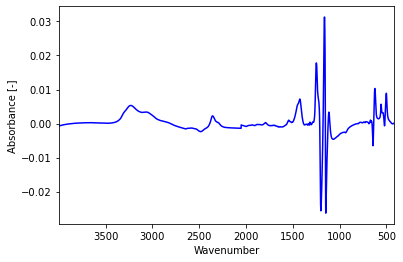

In [30]:
# Print and example of spectra

x = data_lab_spec["Wavenumber"]
y = data_lab_spec["X01298"]

fig = plt.figure()
plt.plot(x, y, 'b')
plt.xlabel('Wavenumber')
plt.ylabel('Absorbance [-]')
plt.axis([max(x),min(x),min(y)-0.1*max(y),max(y)+0.1*max(y)]);

In [31]:
"""
x = data_lab_spec['Wavenumber'].values
del data_lab_spec['Wavenumber']
Y = data_lab_spec.values
"""

"\nx = data_lab_spec['Wavenumber'].values\ndel data_lab_spec['Wavenumber']\nY = data_lab_spec.values\n"

In [32]:
"""
fig = plt.figure(figsize=(10,14))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(211)
    plt.plot(x, Y)
    plt.ylabel('Absorbance spectra')
    plt.xlabel('Wavenumber')
    plt.show()
"""

"\nfig = plt.figure(figsize=(10,14))\nwith plt.style.context(('ggplot')):\n    ax1 = plt.subplot(211)\n    plt.plot(x, Y)\n    plt.ylabel('Absorbance spectra')\n    plt.xlabel('Wavenumber')\n    plt.show()\n"

In [33]:
data_lab_spec.to_csv(PROCESS_LAB_SPEC, sep=',')

# IV. Laboratory samples : concentrations

In [42]:
# Import data
file = pd.read_csv(DATA_PATH_LAB_CONC)
data_lab_conc = pd.DataFrame(file)
data_lab_conc['sample'] = data_lab_conc['sample'].astype(str)

In [35]:
data_lab_conc = data_lab_conc[['sample','TRset','AmmNH_umole_cm2']]
data_lab_conc.head()

,sample,TRset,AmmNH_umole_cm2
0,1012,test,0.561703
1,1020,calibration,1.113116
2,1021,calibration,1.203874
3,1022,test,1.371814
4,1027,calibration,1.687683


In [36]:
print("Minimum value : ", data_lab_conc.min().values)
print("Maximum value : ", data_lab_conc.max().values)

Minimum value :  ['1012' 'calibration' 0.0]
Maximum value :  ['21052' 'test' 7.71977551925496]


## Data analysis

The data from the file is in [$\mu$mol] of NH. By multiplying by (n_(NH4)2SO4/n_NH) × MW_(NH4)2SO4 where n(NH4)2SO4/nNH = 1/8 comes from the number of moles of NH bond per mole of (NH4)2SO4, we get a mass in [$\mu$g] of (NH4)2SO4.

In [37]:
# Molecular weights [g/mol] :
MW_NH4SO4 = 132.14
# Area of the filter [cm2] :
# A = 3.53

data_lab_conc["AmmNH_umole_cm2"] = data_lab_conc["AmmNH_umole_cm2"].multiply(MW_NH4SO4/8)
data_lab_conc["pref"] = 'X0'
data_lab_conc["Sites"] = data_lab_conc["pref"] + data_lab_conc["sample"]
data_lab_conc = data_lab_conc[['Sites','TRset','AmmNH_umole_cm2']]
data_lab_conc.columns = ['Sites','TRset','(NH4)SO4']
data_lab_conc.head()

,Sites,TRset,(NH4)SO4
0,X01012,test,9.277934
1,X01020,calibration,18.385891
2,X01021,calibration,19.884997
3,X01022,test,22.658934
4,X01027,calibration,27.876296


In [38]:
# Dimensions
print("Number of rows : ", len(data_lab_conc), "\n")

# NaN values
nb_nan = data_lab_conc['(NH4)SO4'].isna().sum()
print("Number of NaN values : ", nb_nan, "\n")

# Range of values
print("Minimum value : ", data_lab_conc.min().values)
print("Maximum value : ", data_lab_conc.max().values)

Number of rows :  241 

Number of NaN values :  0 

Minimum value :  ['X01012' 'calibration' 0.0]
Maximum value :  ['X021052' 'test' 127.51139213929379]


In [39]:
#print(data_lab_conc[(data_lab_conc['(NH4)SO4'] >= 100) & (data_lab_conc['(NH4)SO4'] <= 500)])
print(data_lab_conc[data_lab_conc['Sites'] == "X01298"])

      Sites TRset  (NH4)SO4
103  X01298  test  2.462312


Text(0.5, 1.0, 'Checking for outliers')

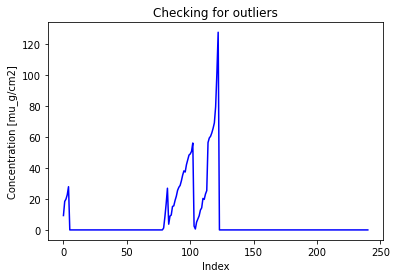

In [40]:
# Print the values to detect outliers

x = data_lab_conc.index
y = data_lab_conc['(NH4)SO4']

fig = plt.figure()
plt.plot(x, y, 'b')
plt.xlabel('Index')
plt.ylabel('Concentration [mu_g/cm2]')
plt.title('Checking for outliers')

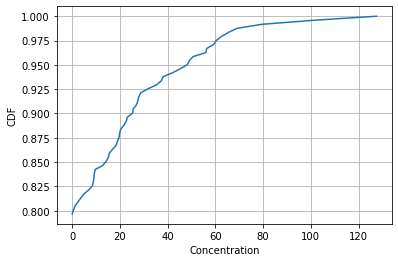

In [41]:
# Cumulative distribution function

# Frequency
stats_lab = y_lab.groupby('(NH4)SO4')['(NH4)SO4'].agg('count') \
                        .pipe(pd.DataFrame) \
                        .rename(columns = {'(NH4)SO4':'frequency'})\
                        .reset_index()

# PDF
stats_lab['pdf'] = stats_lab['frequency']/sum(stats_lab['frequency'])

stats_lab = stats_lab.drop(stats_lab.index[0])
# About 80% of the data are zero values.

Remark : There are a lot of zero values. But we keep them.

In [42]:
data_lab_conc.to_csv(PROCESS_LAB_CONC, sep=',')

## Selection of samples

In [43]:
sites_spec = pd.DataFrame(data_lab_spec.columns, columns = ['Sites'])
sites_spec = sites_spec.drop(sites_spec.index[[0]]).reset_index(drop=True)

sites_conc_train = data_lab_conc[['Sites']].loc[data_lab_conc['TRset'] == 'calibration'].reset_index(drop=True)
sites_conc_test = data_lab_conc[['Sites']].loc[data_lab_conc['TRset'] == 'test'].reset_index(drop=True)

sites_both_train = pd.merge(sites_conc_train, sites_spec, how='inner').values.ravel()
sites_both_test = pd.merge(sites_conc_test, sites_spec, how='inner').values.ravel()

data_lab_spec_train = data_lab_spec[sites_both_train]
data_lab_spec_test = data_lab_spec[sites_both_test]

data_lab_conc_train = data_lab_conc[['Sites', '(NH4)SO4']].loc[data_lab_conc['Sites'].isin(sites_both_train)]
data_lab_conc_test = data_lab_conc[['Sites', '(NH4)SO4']].loc[data_lab_conc['Sites'].isin(sites_both_test)]

In [44]:
print("Number of rows : ", len(data_lab_conc_train))
print("Number of rows : ", len(data_lab_spec_train.columns))

Number of rows :  144
Number of rows :  144


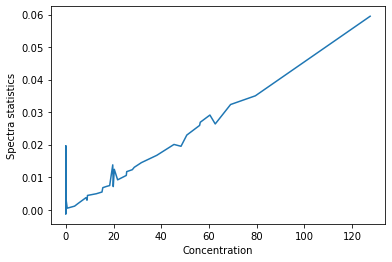

In [45]:
info = 'mean'
info_lab_spec_train = data_lab_spec_train.describe()
info_lab_conc_train = data_lab_conc_train
info_lab_conc_train[info] = info_lab_spec_train.loc[[info]].values.ravel()
info_lab_conc_train = info_lab_conc_train.sort_values("(NH4)SO4", ascending=True).reset_index(drop=True)
plt.plot(info_lab_conc_train['(NH4)SO4'], info_lab_conc_train[info])
plt.xlabel('Concentration')
plt.ylabel('Spectra statistics')
plt.show()

## Saving the cleaned data

Saving the processed data as arrays (without any labels), to be input of the machine learning models.

In [46]:
mat_lab_spec_train = data_lab_spec_train.reset_index(drop=True).to_numpy()
mat_lab_spec_test = data_lab_spec_test.reset_index(drop=True).to_numpy()

mat_lab_conc_train = data_lab_conc_train['(NH4)SO4'].reset_index(drop=True).to_numpy()
mat_lab_conc_test = data_lab_conc_test['(NH4)SO4'].reset_index(drop=True).to_numpy()

ind_lab_conc_train = data_lab_conc_train['Sites'].reset_index(drop=True)
ind_lab_conc_test = data_lab_conc_test['Sites'].reset_index(drop=True)

print(mat_lab_spec_train.shape)
print(mat_lab_conc_train.shape)

print(mat_lab_spec_test.shape)
print(mat_lab_conc_test.shape)

np.savetxt(OUTPUT_LAB_SPEC_TRAIN, mat_lab_spec_train, delimiter=',')
np.savetxt(OUTPUT_LAB_CONC_TRAIN, mat_lab_conc_train, delimiter=',')
np.savetxt(OUTPUT_LAB_SPEC_TEST, mat_lab_spec_test, delimiter=',')
np.savetxt(OUTPUT_LAB_CONC_TEST, mat_lab_conc_test, delimiter=',')

ind_lab_conc_train.to_csv(INDEX_LAB_CONC_TRAIN, sep=',')
ind_lab_conc_test.to_csv(INDEX_LAB_CONC_TEST, sep=',')

(2784, 144)
(144,)
